In [37]:
from google.cloud import bigquery
#import db-dtypes
import os
import pandas as pd
# Create a BigQuery client object
#from pyspark.sql import SparkSession
#from pyspark.ml.regression import LinearRegression
#from pyspark.ml.feature import VectorAssembler

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "nifty-expanse-380117-34182b0834a5.json"
client = bigquery.Client()
# Construct the SQL query to fetch data from a table in the database
sql_query1 = """SELECT * FROM `bigquery-public-data.new_york_taxi_trips.tlc_green_trips_2020`"""
# Execute the query and fetch the results
query_job = client.query(sql_query1)
df1 = query_job.to_dataframe()




In [20]:
df1.shape

(1734165, 24)

In [21]:
df1.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'store_and_fwd_flag', 'rate_code', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'ehail_fee', 'airport_fee', 'total_amount', 'payment_type',
       'distance_between_service', 'time_between_service', 'trip_type',
       'imp_surcharge', 'pickup_location_id', 'dropoff_location_id',
       'data_file_year', 'data_file_month'],
      dtype='object')

In [22]:
df1.describe

<bound method NDFrame.describe of         vendor_id           pickup_datetime          dropoff_datetime  \
0               2 2020-04-07 01:12:39+00:00 2020-04-07 01:30:44+00:00   
1               2 2020-04-09 09:52:27+00:00 2020-04-09 09:52:32+00:00   
2               2 2020-04-09 10:45:27+00:00 2020-04-09 10:46:16+00:00   
3               1 2020-04-15 15:04:20+00:00 2020-04-15 15:06:33+00:00   
4               2 2020-04-17 00:14:19+00:00 2020-04-17 00:23:31+00:00   
...           ...                       ...                       ...   
1734160         2 2020-01-09 06:07:00+00:00 2020-01-09 06:40:00+00:00   
1734161         2 2020-01-07 07:49:00+00:00 2020-01-07 08:29:00+00:00   
1734162         2 2020-01-09 07:42:00+00:00 2020-01-09 08:07:00+00:00   
1734163         2 2020-01-22 11:46:00+00:00 2020-01-22 12:16:00+00:00   
1734164         2 2020-01-27 08:52:56+00:00 2020-01-27 11:16:55+00:00   

        store_and_fwd_flag rate_code  passenger_count  trip_distance  \
0                

In [23]:
df1.trip_distance.min()

Decimal('-33.690000000')

In [24]:
df1.trip_distance.max()

Decimal('205654.120000000')

In [25]:
df1.trip_distance.mean()

17.29147615134661

In [ ]:
df1.dtypes

vendor_id                                object
pickup_datetime             datetime64[ns, UTC]
dropoff_datetime            datetime64[ns, UTC]
store_and_fwd_flag                       object
rate_code                                object
passenger_count                           Int64
trip_distance                             int64
fare_amount                              object
extra                                    object
mta_tax                                  object
tip_amount                               object
tolls_amount                             object
ehail_fee                                object
airport_fee                              object
total_amount                             object
payment_type                             object
distance_between_service                 object
time_between_service                      Int64
trip_type                                object
imp_surcharge                            object
pickup_location_id                      

In [26]:
df1['trip_distance'] = df1['trip_distance'].astype(int)

In [27]:
df1.trip_distance.unique()

array([     7,      0,      2,      1,      9,     11,      3,      5,
            8,     20,     16,     19,     17,     15,      4,     12,
           10,     14,      6,     13,     23,     25,     26,     18,
           24,     31,     22,     21,     30,     29,     27,     32,
           88,     28,   6726,   6752,   6712,     36,  55027,     35,
           38,   6738,   6733,     33,     37,  26471,  41813,   6719,
           34,   6702,     39,     67,     62,     41, 149267, 131317,
           60,  11266,     57,  94703,  35465,  38283,  11549, 116920,
           45, 132205,  81823,  12244, 117898,  12142,   5785,  11540,
          107,  37067,     46, 169330,     44,  37079,  11275,     40,
        84052, 116981,     47,     50,  82220,     52, 169320,  49245,
       117347,  75426,     65,  42893, 133499,     42, 134121,     55,
       134341,     51,     79,     84, 134017,  44222,  48550,  84439,
       133662,  34873, 133669,     49, 132850, 133533, 148387,  49185,
      

In [28]:
newdf1 = df1.loc[df1['trip_distance'] >= 0]

In [29]:
import pandas as pd
import numpy as np

def remove_outliers(df1, column, lower_bound=None, upper_bound=None):
    if lower_bound is None:
        lower_bound = df1[column].quantile(0.25) - 1.5 * (df1[column].quantile(0.75) - df1[column].quantile(0.25))
    if upper_bound is None:
        upper_bound = df1[column].quantile(0.75) + 1.5 * (df1[column].quantile(0.75) - df1[column].quantile(0.25))
    df1_filtered = df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]
    return df1_filtered

# Example usage
data_filtered = remove_outliers(df1, 'trip_distance')

In [30]:
newdf1.trip_distance.mean()

16.828711353052757

In [31]:
newdf1.trip_distance.max()

205654

In [32]:
df1.total_amount.min()

Decimal('-210.300000000')

In [38]:
df1.passenger_count.isna().sum()

528216

In [39]:
df1.dropna(subset=['passenger_count'], inplace=True)


In [40]:
df1 = df1[df1['passenger_count'] != 0]

In [41]:
df1.passenger_count.unique()

<IntegerArray>
[2, 3, 1, 6, 5, 4, 8, 7, 9]
Length: 9, dtype: Int64

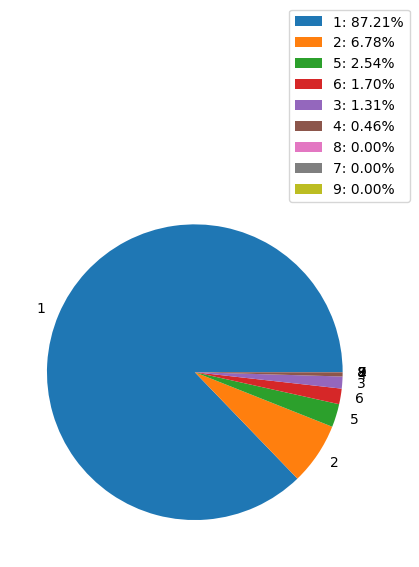

<Figure size 800x800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data


# Get value counts for the column
value_counts = df1['passenger_count'].value_counts()

# Plot pie chart
fig, ax = plt.subplots()
ax.pie(value_counts, labels=value_counts.index)
plt.figure(figsize=(8, 8))

# Add percentage values to legend
total = sum(value_counts)
vals = value_counts.values
labels = value_counts.index
percentages = ["{0:.2f}%".format(val/total*100) for val in vals]
legends = [f'{label}: {percentage}' for label, percentage in zip(labels, percentages)]
ax.legend(legends, loc="upper right",bbox_to_anchor=(1.1, 1.5))

plt.savefig('fare_by_hour.png', dpi=300, bbox_inches='tight')
#plt.savefig('pie_payment2020.png')
plt.show()



In [49]:
from google.cloud import bigquery
#import db-dtypes
import os
import pandas as pd
# Create a BigQuery client object
#from pyspark.sql import SparkSession
#from pyspark.ml.regression import LinearRegression
#from pyspark.ml.feature import VectorAssembler

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "nifty-expanse-380117-34182b0834a5.json"
client = bigquery.Client()
# Construct the SQL query to fetch data from a table in the database
sql_query1 = """SELECT * FROM `bigquery-public-data.new_york_taxi_trips.tlc_green_trips_2020`"""
# Execute the query and fetch the results
query_job = client.query(sql_query1)
df1 = query_job.to_dataframe()


In [ ]:
df1.pickup_location_id.max()

'99'

In [ ]:
df1.pickup_location_id.max()

'99'

In [ ]:
df1.head()

,vendor_id,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_code,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,total_amount,payment_type,distance_between_service,time_between_service,trip_type,imp_surcharge,pickup_location_id,dropoff_location_id,data_file_year,data_file_month
0,2,2020-04-02 12:20:08+00:00,2020-04-02 12:21:30+00:00,N,1.0,1,0E-9,0E-9,0E-9,0E-9,...,0E-9,1.0,None,<NA>,1.0,0E-9,193,193,2020,4
1,2,2020-04-06 03:09:37+00:00,2020-04-06 03:10:58+00:00,N,1.0,1,0.130000000,0E-9,0E-9,0E-9,...,0E-9,2.0,None,<NA>,1.0,0E-9,152,152,2020,4
2,2,2020-04-08 03:15:47+00:00,2020-04-08 03:37:11+00:00,N,1.0,1,7.110000000,0E-9,0E-9,0E-9,...,0E-9,2.0,None,<NA>,1.0,0E-9,127,75,2020,4
3,1,2020-04-13 10:37:14+00:00,2020-04-13 10:37:46+00:00,N,1.0,1,0E-9,0E-9,0E-9,0E-9,...,0E-9,3.0,None,<NA>,1.0,0E-9,152,152,2020,4
4,2,2020-04-18 13:08:11+00:00,2020-04-18 13:08:24+00:00,N,1.0,1,0E-9,0E-9,0E-9,0E-9,...,0E-9,1.0,None,<NA>,1.0,0E-9,193,193,2020,4


In [50]:
from google.cloud import bigquery
#import db-dtypes
import os
import pandas as pd
# Create a BigQuery client object
#from pyspark.sql import SparkSession
#from pyspark.ml.regression import LinearRegression
#from pyspark.ml.feature import VectorAssembler

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "nifty-expanse-380117-34182b0834a5.json"
client = bigquery.Client()
# Construct the SQL query to fetch data from a table in the database
sql_query1 = """SELECT * FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`"""
# Execute the query and fetch the results
query_job = client.query(sql_query1)
zone = query_job.to_dataframe()


In [51]:
new_df = pd.DataFrame({
    'Pick-up': df1['pickup_location_id'],
    'Drop-off': df1['dropoff_location_id']
})

In [52]:
new_df

,Pick-up,Drop-off
0,116,244
1,193,264
2,193,193
3,193,193
4,208,208
...,...,...
1734160,38,237
1734161,41,254
1734162,242,166
1734163,42,183


In [53]:
zone['zone_id'].max()

'99'

In [54]:
zone['zone_name_borough'] = zone['zone_name'] + '-' + zone['borough']

# display merged dataframe
print(zone)

    zone_id                  zone_name        borough  \
0         1             Newark Airport            EWR   
1         3    Allerton/Pelham Gardens          Bronx   
2        18               Bedford Park          Bronx   
3        20                    Belmont          Bronx   
4        31                 Bronx Park          Bronx   
..      ...                        ...            ...   
258     206  Saint George/New Brighton  Staten Island   
259     214   South Beach/Dongan Hills  Staten Island   
260     221                  Stapleton  Staten Island   
261     245              West Brighton  Staten Island   
262     251                Westerleigh  Staten Island   

                                             zone_geom  \
0    POLYGON((-74.1856319999999 40.6916479999999, -...   
1    POLYGON((-73.848596761 40.8716707849999, -73.8...   
2    POLYGON((-73.8844286139999 40.8668003789999, -...   
3    POLYGON((-73.8839239579998 40.8644177609999, -...   
4    POLYGON((-73.8710017

In [55]:
zone.columns

Index(['zone_id', 'zone_name', 'borough', 'zone_geom', 'zone_name_borough'], dtype='object')

In [56]:
zone = zone.drop(columns=['zone_name', 'borough', 'zone_geom'])

In [57]:
zone.columns

Index(['zone_id', 'zone_name_borough'], dtype='object')

In [58]:
zone.head()

,zone_id,zone_name_borough
0,1,Newark Airport-EWR
1,3,Allerton/Pelham Gardens-Bronx
2,18,Bedford Park-Bronx
3,20,Belmont-Bronx
4,31,Bronx Park-Bronx


In [60]:
merged_df = pd.merge(new_df, zone, how='left', left_on='Pick-up', right_on='zone_id')


In [61]:
merged_df

,Pick-up,Drop-off,zone_id,zone_name_borough
0,116,244,116,Hamilton Heights-Manhattan
1,193,264,193,Queensbridge/Ravenswood-Queens
2,193,193,193,Queensbridge/Ravenswood-Queens
3,193,193,193,Queensbridge/Ravenswood-Queens
4,208,208,208,Schuylerville/Edgewater Park-Bronx
...,...,...,...,...
1738751,38,237,38,Cambria Heights-Queens
1738752,41,254,41,Central Harlem-Manhattan
1738753,242,166,242,Van Nest/Morris Park-Bronx
1738754,42,183,42,Central Harlem North-Manhattan


In [62]:
merged_df = pd.merge(merged_df, zone, how='left', left_on='Drop-off', right_on='zone_id')

In [63]:
merged_df


,Pick-up,Drop-off,zone_id_x,zone_name_borough_x,zone_id_y,zone_name_borough_y
0,116,244,116,Hamilton Heights-Manhattan,244,Washington Heights South-Manhattan
1,193,264,193,Queensbridge/Ravenswood-Queens,NaN,NaN
2,193,193,193,Queensbridge/Ravenswood-Queens,193,Queensbridge/Ravenswood-Queens
3,193,193,193,Queensbridge/Ravenswood-Queens,193,Queensbridge/Ravenswood-Queens
4,208,208,208,Schuylerville/Edgewater Park-Bronx,208,Schuylerville/Edgewater Park-Bronx
...,...,...,...,...,...,...
1749128,38,237,38,Cambria Heights-Queens,237,Upper East Side South-Manhattan
1749129,41,254,41,Central Harlem-Manhattan,254,Williamsbridge/Olinville-Bronx
1749130,242,166,242,Van Nest/Morris Park-Bronx,166,Morningside Heights-Manhattan
1749131,42,183,42,Central Harlem North-Manhattan,183,Pelham Bay-Bronx


In [64]:
merged_df = merged_df.drop(columns=['zone_id_x', 'zone_id_y'])

In [65]:
new_names = {'zone_name_borough_x': 'Pick-up_location', 'zone_name_borough_y': 'Drop-off_location'}
location = merged_df.rename(columns=new_names)

In [66]:
location

,Pick-up,Drop-off,Pick-up_location,Drop-off_location
0,116,244,Hamilton Heights-Manhattan,Washington Heights South-Manhattan
1,193,264,Queensbridge/Ravenswood-Queens,NaN
2,193,193,Queensbridge/Ravenswood-Queens,Queensbridge/Ravenswood-Queens
3,193,193,Queensbridge/Ravenswood-Queens,Queensbridge/Ravenswood-Queens
4,208,208,Schuylerville/Edgewater Park-Bronx,Schuylerville/Edgewater Park-Bronx
...,...,...,...,...
1749128,38,237,Cambria Heights-Queens,Upper East Side South-Manhattan
1749129,41,254,Central Harlem-Manhattan,Williamsbridge/Olinville-Bronx
1749130,242,166,Van Nest/Morris Park-Bronx,Morningside Heights-Manhattan
1749131,42,183,Central Harlem North-Manhattan,Pelham Bay-Bronx


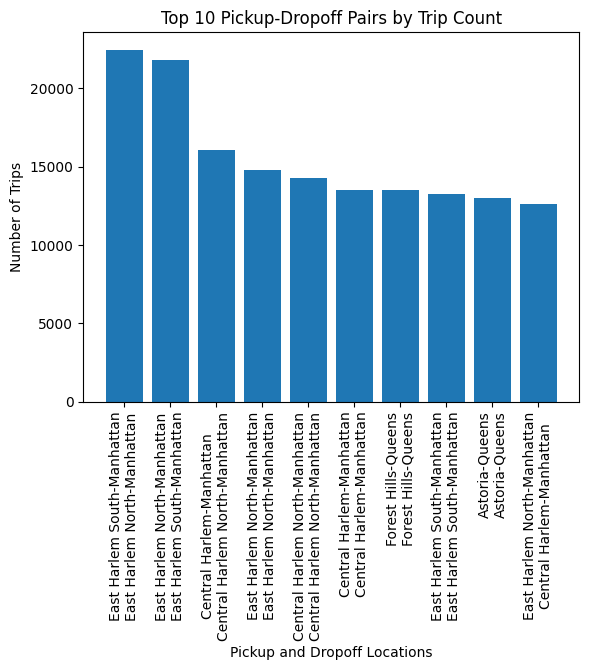

In [68]:
trip_counts = location.groupby(['Pick-up_location', 'Drop-off_location']).size().reset_index(name='count')

# Sort the trip counts in descending order
trip_counts = trip_counts.sort_values(by='count', ascending=False)

# Plot a bar chart of the top 10 pickup-dropoff pairs by trip count
top_pairs = trip_counts.head(10)
plt.bar(range(len(top_pairs)), top_pairs['count'])
plt.xticks(range(len(top_pairs)), [f"{pickup}\n{dropoff}" for pickup, dropoff in zip(top_pairs['Pick-up_location'], top_pairs['Drop-off_location'])])
plt.xlabel('Pickup and Dropoff Locations')
plt.ylabel('Number of Trips')
plt.title('Top 10 Pickup-Dropoff Pairs by Trip Count')
plt.xticks(rotation=90)
plt.savefig('Pickup.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
df1.time_between_service.isna()

0          True
1          True
2          True
3          True
4          True
           ... 
1734160    True
1734161    True
1734162    True
1734163    True
1734164    True
Name: time_between_service, Length: 1734165, dtype: bool

In [69]:
df1.trip_type.unique()

array(['1.0', '2.0', None], dtype=object)

In [70]:
df1.trip_type.nunique()

2

In [71]:
df1.rate_code.unique()

array(['1.0', '5.0', None, '2.0', '4.0', '3.0', '6.0', '99.0'],
      dtype=object)

In [72]:
df1.rate_code.nunique()

7

In [73]:
df1.fare_amount.min()

Decimal('-210.000000000')

In [74]:
df1.total_amount.min()

Decimal('-210.300000000')

In [75]:
df1.total_amount.max()

Decimal('803.800000000')

In [76]:
df1.fare_amount.min()

Decimal('-210.000000000')

In [77]:
df1.passenger_count.min()

0

In [78]:
df1 = df1[df1['passenger_count'] != 0]

In [79]:
df1.passenger_count.unique()

<IntegerArray>
[2, 3, 1, 6, 5, 4, 8, 7, 9]
Length: 9, dtype: Int64

In [80]:
df1.data_file_month.unique()

<IntegerArray>
[4, 5, 6, 11, 7, 10, 8, 2, 9, 12, 3, 1]
Length: 12, dtype: Int64

In [81]:
monthly_stats = df1.groupby('data_file_month').agg({'fare_amount': 'sum', 'passenger_count': 'sum'})

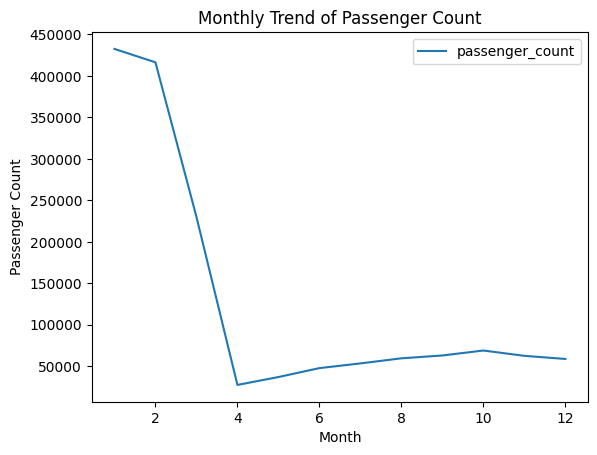

In [82]:
monthly_stats.plot(kind='line', y='passenger_count',legend=True)

plt.xlabel('Month')
plt.ylabel('Passenger Count')
plt.title('Monthly Trend of Passenger Count')
plt.savefig('month_passenger_count.png', dpi=300, bbox_inches='tight')
plt.show()

In [83]:
from google.cloud import bigquery
#import db-dtypes
import os
import pandas as pd
# Create a BigQuery client object
#from pyspark.sql import SparkSession
#from pyspark.ml.regression import LinearRegression
#from pyspark.ml.feature import VectorAssembler

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "nifty-expanse-380117-34182b0834a5.json"
client = bigquery.Client()
# Construct the SQL query to fetch data from a table in the database
sql_query1 = """SELECT * FROM `bigquery-public-data.new_york_taxi_trips.tlc_green_trips_2020`"""
# Execute the query and fetch the results
query_job = client.query(sql_query1)
df1 = query_job.to_dataframe()


In [84]:
df1.total_amount.max()

Decimal('803.800000000')

In [85]:
df1.total_amount.min()

Decimal('-210.300000000')

In [86]:
df1 = df1[df1['total_amount'] >= 0]


In [87]:
df1.total_amount.min()

Decimal('0E-9')

In [88]:
df1 = df1[df1['total_amount'] != 0E-9]

In [ ]:
df1.total_amount.min()

Decimal('0.010000000')

In [89]:
df1 = df1[df1['total_amount'] >= 1]

In [ ]:
df1.total_amount.min()

Decimal('1.000000000')

In [ ]:
df1.total_amount.max()

Decimal('803.800000000')

In [ ]:
df1.total_amount.mean()

20.286997386658104

In [ ]:
df1.data_file_month.unique()

<IntegerArray>
[4, 5, 6, 11, 7, 10, 8, 2, 9, 12, 3, 1]
Length: 12, dtype: Int64

In [90]:
monthly_stats = df1.groupby('data_file_month').agg({'fare_amount': 'sum'})

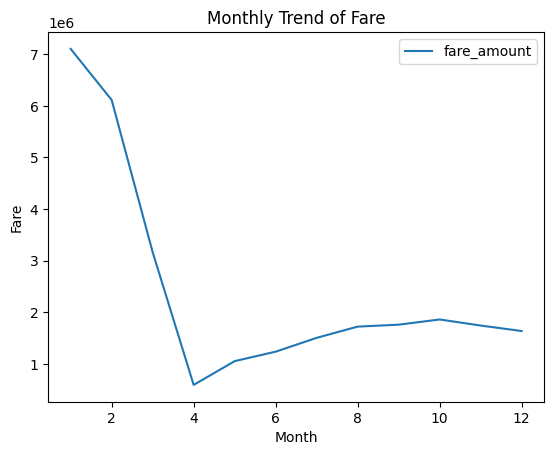

In [91]:
monthly_stats['fare_amount'] = pd.to_numeric(monthly_stats['fare_amount'], errors='coerce')
monthly_stats.plot(kind='line', y='fare_amount', legend=True)

plt.xlabel('Month')
plt.ylabel('Fare')
plt.title('Monthly Trend of Fare')
plt.savefig('monthlytrend.png', dpi=300, bbox_inches='tight')
plt.show()


In [92]:
from google.cloud import bigquery
#import db-dtypes
import os
import pandas as pd
# Create a BigQuery client object
#from pyspark.sql import SparkSession
#from pyspark.ml.regression import LinearRegression
#from pyspark.ml.feature import VectorAssembler

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "nifty-expanse-380117-34182b0834a5.json"
client = bigquery.Client()
# Construct the SQL query to fetch data from a table in the database
sql_query1 = """SELECT * FROM `bigquery-public-data.new_york_taxi_trips.tlc_green_trips_2020`"""
# Execute the query and fetch the results
query_job = client.query(sql_query1)
df1 = query_job.to_dataframe()


In [93]:
df1.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'store_and_fwd_flag', 'rate_code', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'ehail_fee', 'airport_fee', 'total_amount', 'payment_type',
       'distance_between_service', 'time_between_service', 'trip_type',
       'imp_surcharge', 'pickup_location_id', 'dropoff_location_id',
       'data_file_year', 'data_file_month'],
      dtype='object')

In [94]:
df1.pickup_datetime

0         2020-04-02 12:20:08+00:00
1         2020-04-06 03:09:37+00:00
2         2020-04-08 03:15:47+00:00
3         2020-04-13 10:37:14+00:00
4         2020-04-18 13:08:11+00:00
                     ...           
1734160   2020-01-06 07:19:00+00:00
1734161   2020-01-05 16:31:00+00:00
1734162   2020-01-13 15:33:00+00:00
1734163   2020-01-24 15:06:00+00:00
1734164   2020-01-27 21:20:00+00:00
Name: pickup_datetime, Length: 1734165, dtype: datetime64[ns, UTC]

In [95]:
import pandas as pd
from datetime import datetime

# Load the data into a pandas DataFrame
#df1 = pd.read_csv('your_file.csv')

# Convert the pickup_datetime column to a datetime object
df1['pickup_datetime'] = pd.to_datetime(df1['pickup_datetime'])

# Extract the pickup time as a separate column
df1['pickup_time'] = df1['pickup_datetime'].apply(lambda x: datetime.strftime(x, '%H:%M:%S'))

# Print the first few rows to verify the results
print(df1.head())

  vendor_id           pickup_datetime          dropoff_datetime  \
0         2 2020-04-02 12:20:08+00:00 2020-04-02 12:21:30+00:00   
1         2 2020-04-06 03:09:37+00:00 2020-04-06 03:10:58+00:00   
2         2 2020-04-08 03:15:47+00:00 2020-04-08 03:37:11+00:00   
3         1 2020-04-13 10:37:14+00:00 2020-04-13 10:37:46+00:00   
4         2 2020-04-18 13:08:11+00:00 2020-04-18 13:08:24+00:00   

  store_and_fwd_flag rate_code  passenger_count trip_distance fare_amount  \
0                  N       1.0                1          0E-9        0E-9   
1                  N       1.0                1   0.130000000        0E-9   
2                  N       1.0                1   7.110000000        0E-9   
3                  N       1.0                1          0E-9        0E-9   
4                  N       1.0                1          0E-9        0E-9   

  extra mta_tax  ... payment_type distance_between_service  \
0  0E-9    0E-9  ...          1.0                     None   
1  0E-9   

In [96]:
df1.head()

,vendor_id,pickup_datetime,dropoff_datetime,store_and_fwd_flag,rate_code,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,payment_type,distance_between_service,time_between_service,trip_type,imp_surcharge,pickup_location_id,dropoff_location_id,data_file_year,data_file_month,pickup_time
0,2,2020-04-02 12:20:08+00:00,2020-04-02 12:21:30+00:00,N,1.0,1,0E-9,0E-9,0E-9,0E-9,...,1.0,None,<NA>,1.0,0E-9,193,193,2020,4,12:20:08
1,2,2020-04-06 03:09:37+00:00,2020-04-06 03:10:58+00:00,N,1.0,1,0.130000000,0E-9,0E-9,0E-9,...,2.0,None,<NA>,1.0,0E-9,152,152,2020,4,03:09:37
2,2,2020-04-08 03:15:47+00:00,2020-04-08 03:37:11+00:00,N,1.0,1,7.110000000,0E-9,0E-9,0E-9,...,2.0,None,<NA>,1.0,0E-9,127,75,2020,4,03:15:47
3,1,2020-04-13 10:37:14+00:00,2020-04-13 10:37:46+00:00,N,1.0,1,0E-9,0E-9,0E-9,0E-9,...,3.0,None,<NA>,1.0,0E-9,152,152,2020,4,10:37:14
4,2,2020-04-18 13:08:11+00:00,2020-04-18 13:08:24+00:00,N,1.0,1,0E-9,0E-9,0E-9,0E-9,...,1.0,None,<NA>,1.0,0E-9,193,193,2020,4,13:08:11


In [97]:
# Create a new column indicating if pickup_time is at night or during the day
df1['pickup_time_period'] = df1['pickup_datetime'].apply(lambda x: 'night' if ((x.hour >= 20) or (x.hour < 8)) else 'day')

# Print the first few rows to verify the results
print(df1.head())


  vendor_id           pickup_datetime          dropoff_datetime  \
0         2 2020-04-02 12:20:08+00:00 2020-04-02 12:21:30+00:00   
1         2 2020-04-06 03:09:37+00:00 2020-04-06 03:10:58+00:00   
2         2 2020-04-08 03:15:47+00:00 2020-04-08 03:37:11+00:00   
3         1 2020-04-13 10:37:14+00:00 2020-04-13 10:37:46+00:00   
4         2 2020-04-18 13:08:11+00:00 2020-04-18 13:08:24+00:00   

  store_and_fwd_flag rate_code  passenger_count trip_distance fare_amount  \
0                  N       1.0                1          0E-9        0E-9   
1                  N       1.0                1   0.130000000        0E-9   
2                  N       1.0                1   7.110000000        0E-9   
3                  N       1.0                1          0E-9        0E-9   
4                  N       1.0                1          0E-9        0E-9   

  extra mta_tax  ... distance_between_service time_between_service trip_type  \
0  0E-9    0E-9  ...                     None         

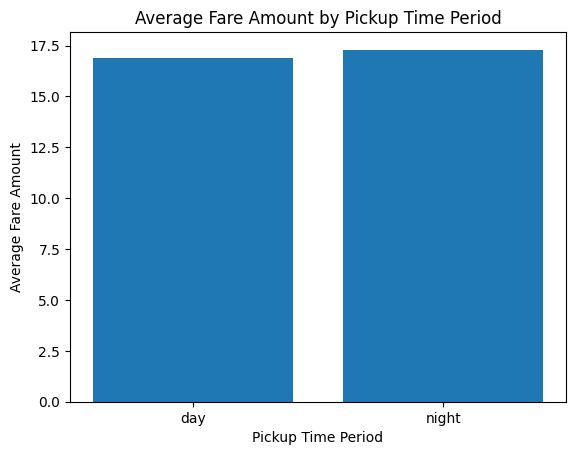

In [98]:

import matplotlib.pyplot as plt

# Calculate the average fare amount by pickup time period
fare_by_time_period = df1.groupby('pickup_time_period')['fare_amount'].mean()

# Create a bar plot of average fare amount by pickup time period
plt.bar(fare_by_time_period.index, fare_by_time_period.values)

# Set the plot title and axis labels
plt.title('Average Fare Amount by Pickup Time Period')
plt.xlabel('Pickup Time Period')
plt.ylabel('Average Fare Amount')
plt.savefig('fare_pickup', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

Average Fare Amount by Pickup Time Period:
pickup_time_period
day      16.876317
night    17.294560
Name: fare_amount, dtype: float64


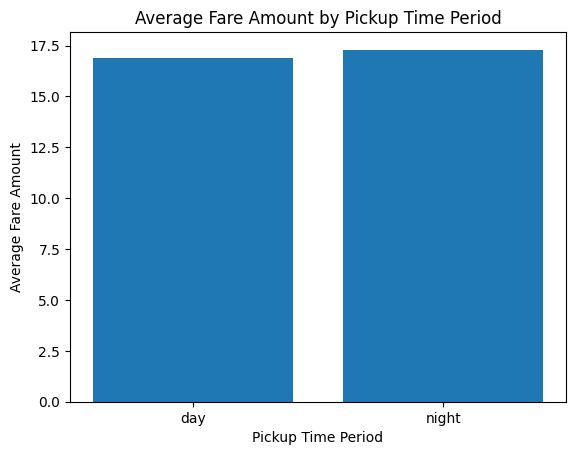

In [99]:
import matplotlib.pyplot as plt

# Calculate the average fare amount by pickup time period
fare_by_time_period = df1.groupby('pickup_time_period')['fare_amount'].mean()

# Print the average fare amount by pickup time period
print("Average Fare Amount by Pickup Time Period:")
print(fare_by_time_period)

# Create a bar plot of average fare amount by pickup time period
plt.bar(fare_by_time_period.index, fare_by_time_period.values)

# Set the plot title and axis labels
plt.title('Average Fare Amount by Pickup Time Period')
plt.xlabel('Pickup Time Period')
plt.ylabel('Average Fare Amount')

# Show the plot
plt.show()


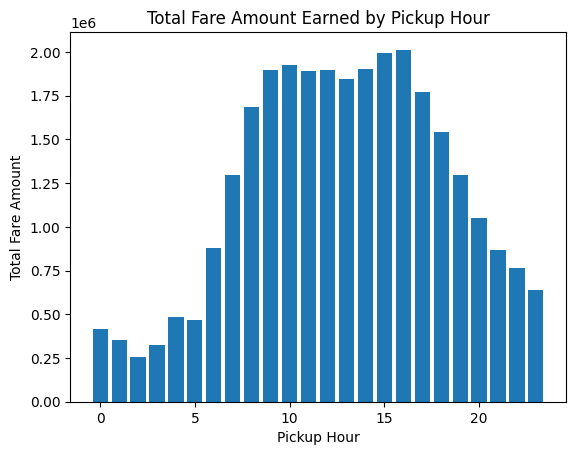

In [101]:
# Create a new column to extract the hour component of pickup_datetime
df1['pickup_hour'] = df1['pickup_datetime'].apply(lambda x: x.hour)

# Calculate the total fare amount earned for each pickup hour
fare_by_hour = df1.groupby('pickup_hour')['fare_amount'].sum()

# Create a bar plot of total fare amount earned by pickup hour
plt.bar(fare_by_hour.index, fare_by_hour.values)

# Set the plot title and axis labels
plt.title('Total Fare Amount Earned by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Total Fare Amount')

plt.savefig('total_fare_pickup.png', dpi=300, bbox_inches='tight')


# Show the plot
plt.show()


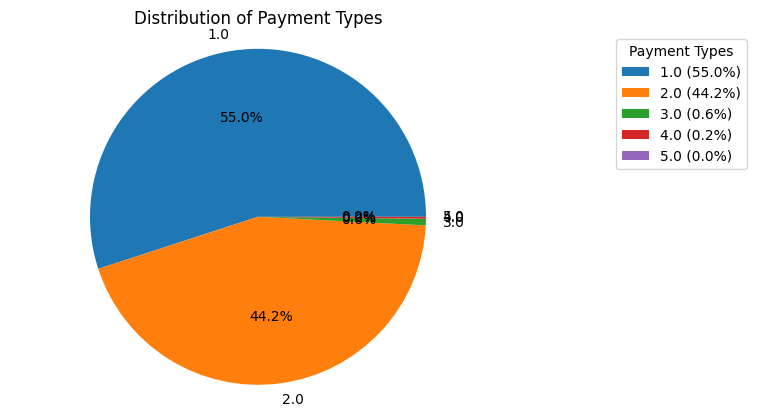

In [102]:
# Example code
import pandas as pd
import matplotlib.pyplot as plt

# Load NYC taxi fare data into a dataframe (replace 'filename.csv' with your actual filename)
#df = pd.read_csv('filename.csv')

# Count the number of occurrences of each payment type
payment_counts = df1['payment_type'].value_counts()

# Create a pie chart showing the distribution of payment types
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Payment Types')

# Add a legend to the chart with percentage values
plt.legend(title='Payment Types', loc='best', bbox_to_anchor=(1, 0, 0.5, 1),
           labels=['{} ({:.1f}%)'.format(i,j*100/sum(payment_counts)) for i,j in payment_counts.items()])

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig('payment_distib.png', dpi=300, bbox_inches='tight')

plt.show()
